# Customer Segmentation with K-Means Clustering based on RFMI Model
# Table of Contents

1.Introduction

2.Data Understanding

3.Data Pre-processing

4.Exploratory Data Analysis

5.RFM Analysis

6.K-Means Clustering on RFM Values

7.Results

8.Conclusion

9.Recommendations

# Introduction
This project aims to divide customers into segments based on RFMI method and K-Means Clustering Model, which in turn creates tailored marketing strategies according to the customer behavior, characteristics, and needs.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Data Understanding

The dataset contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. It can be found here and the attributes are as follows.

InvoiceNo: Invoice number, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name.

Quantity: The quantities of each product (item) per transaction

InvoiceDate: Invice Date and time, the day and time when each transaction was generated.

UnitPrice: Unit price, Product price per unit in sterling.

CustomerID: Customer number, a 5-digit integral number uniquely assigned to each customer.

Country: Country name, the name of the country where each customer resides.

In [6]:
df = pd.read_csv("Online_Retail.csv")

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
#exploring the data types of columns and the number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
df.shape

(541909, 8)

# 1. Data Pre-processing

# 1.1 Missing Value Handling

In [16]:
#checking how many missing values do we have 
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Droping Missing Values from CustomerID

In [19]:
#dropping Null records
df.dropna(subset='CustomerID',inplace=True)

In [21]:
df['CustomerID'].isnull().sum()

0

In [23]:
df.shape

(406829, 8)

The rows before removing null values are 541909 after removing the missing values we can se the rows are 406829

# 1.2 Adding new attribute Sales to the Dataset

In [27]:
#creating a column to calculate total sales value for each transaction
df['Sales'] = round(df['Quantity'] * df['UnitPrice'],2)

After Adding the Sales column in the Data

In [30]:
df_retail=df[df["Sales"]>0]

In [32]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [34]:
df_retail.shape

(397880, 9)

# Exploratory Data Analysis

* Descriptive Statistics

In [38]:
df_retail[["Quantity","UnitPrice"]].describe()

,Quantity,UnitPrice
count,397880.000000,397880.000000
mean,12.988358,3.116519
std,179.332672,22.097986
min,1.000000,0.040000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


# Unique Values of the Customers, Stockdate, Description, Invoice No, Invoice Date

In [41]:
#finding unique numbers of attributes
df_retail.nunique()

InvoiceNo      18532
StockCode       3664
Description     3876
Quantity         301
InvoiceDate    17282
UnitPrice        439
CustomerID      4338
Country           37
Sales           2698
dtype: int64

Stock Codes and their Descriptions  which have more than required

In [44]:
#finding out the StokCodes which have more than 1 Description
df_unique=df_retail.groupby(["StockCode"]).nunique().reset_index()
df_unique=df_unique[df_unique["Description"]>1][["StockCode","Description"]].sort_values(by=["Description"],ascending=False)
df_unique.head()

,StockCode,Description
2066,23236,4
2026,23196,4
1779,22937,3
1962,23131,3
2184,23370,3


Total Sales by Top 10 Countries

In [47]:
df_top=df_retail.groupby(by=["Country"])
df_top=df_top.agg({"Sales":["sum"]})
df_top.columns = df_top.columns.droplevel(1)  
df_top.sort_values(by=['Sales'],ascending=False,inplace=True)
df_top=df_top.reset_index().head(10)
df_top

,Country,Sales
0,United Kingdom,7308391.55
1,Netherlands,285446.34
2,EIRE,265545.90
3,Germany,228867.14
4,France,209024.05
5,Australia,138521.31
6,Spain,61577.11
7,Switzerland,56443.95
8,Belgium,41196.34
9,Sweden,38378.33


C:\Users\sgsgo\AppData\Local\Temp\ipykernel_21040\3198798715.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")


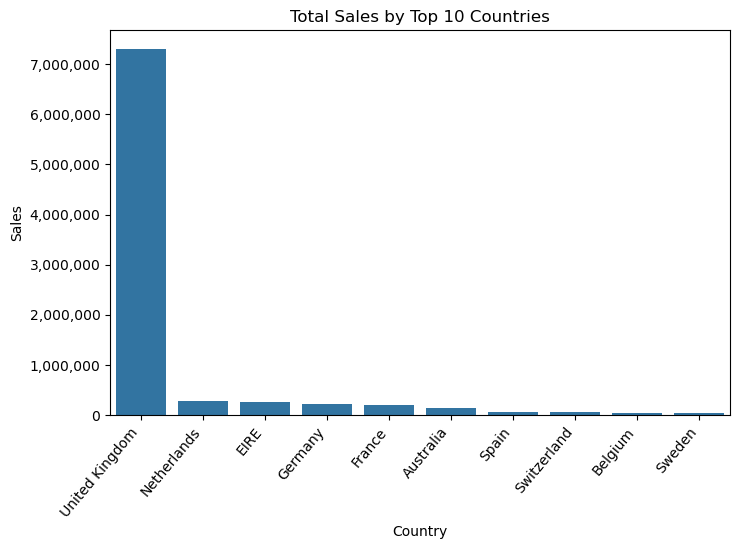

In [49]:
fig, ax = plt.subplots(figsize=(8,5))
ax=sns.barplot(x='Country', y='Sales', data=df_top, estimator=max, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Total Sales by Top 10 Countries")
plt.show()

Average Number of Customers by Top 10 Countries

In [52]:
df_top=df_retail.groupby(by=["Country"])["CustomerID"].nunique()
df_top=df_top.sort_values(ascending=False).head(10)
df_top

Country
United Kingdom    3920
Germany             94
France              87
Spain               30
Belgium             25
Switzerland         21
Portugal            19
Italy               14
Finland             12
Austria             11
Name: CustomerID, dtype: int64

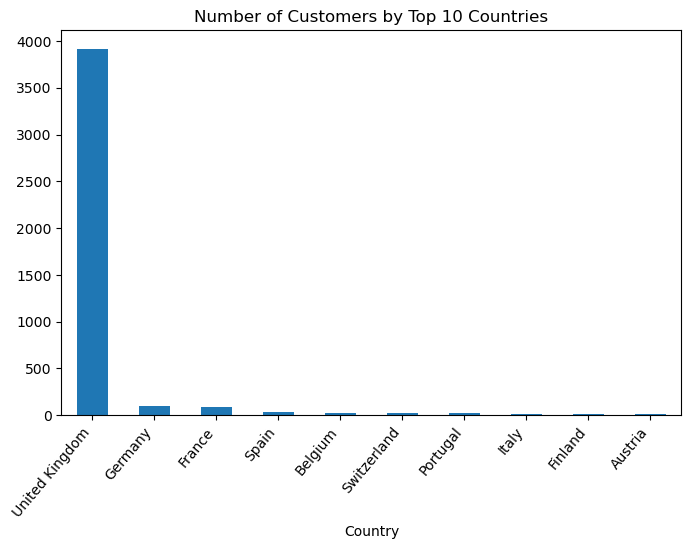

In [54]:
fig, ax = plt.subplots(figsize=(8,5))
df_top.plot(kind="bar",x="Country")
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.title("Number of Customers by Top 10 Countries")
plt.show()

In [56]:
# Ensure InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Sort data by CustomerID and InvoiceDate
df_sorted = df.sort_values(by=['CustomerID', 'InvoiceDate'])

# Calculate the time difference (in days) between each transaction
df_sorted['Prev_InvoiceDate'] = df_sorted.groupby('CustomerID')['InvoiceDate'].shift(1)
df_sorted['Interval_Days'] = (df_sorted['InvoiceDate'] - df_sorted['Prev_InvoiceDate']).dt.days

# Remove first transactions (NaN intervals)
df_intervals = df_sorted.dropna(subset=['Interval_Days'])

# Compute average interval for each customer
interval_df = df_intervals.groupby('CustomerID')['Interval_Days'].mean().reset_index()
interval_df.columns = ['CustomerID', 'Interval']


# 2. RFMI Analysis
In this step, we transform our transactional data into meaningful RFMI (Recency, Frequency, Monetary,Interval) features for each customer. These metrics help us analyze customer behavior and segment them effectively.

Feature Engineering
The next question is what are the metrics for RFM Analysis? RFMI Analysis stands for Recency, Frequency, and Monetary, Interval Analysis, and their descriptions of them are given as follows.

• Recency: The time since last order with the product of customers.

• Frequency: The total number of transaction between the customer’s invoice date and reference day.

• Monetary: The total transaction value of customers.

• Interval: Measures the regularity of purchases by calculating the time gap between consecutive transactions.

In [60]:
# Convert InvoiceDate column to datetime
df_retail["InvoiceDate"] = pd.to_datetime(df_retail["InvoiceDate"])

C:\Users\sgsgo\AppData\Local\Temp\ipykernel_21040\3044840962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail["InvoiceDate"] = pd.to_datetime(df_retail["InvoiceDate"])


In [62]:
# Now extract day, month, year
df_retail['InvoiceDay'] = df_retail["InvoiceDate"].apply(lambda x: datetime(x.year, x.month, x.day))

C:\Users\sgsgo\AppData\Local\Temp\ipykernel_21040\2691132076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['InvoiceDay'] = df_retail["InvoiceDate"].apply(lambda x: datetime(x.year, x.month, x.day))


In [63]:
#finding the last invoice day + 1 in a new variable to calculate Recency
reference_day=df_retail["InvoiceDay"].max()+timedelta(1)

In [66]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [68]:
# calculating RFMI values for each transaction and save them in a new dataframe "rfmi"
rfmi = df_retail.groupby('CustomerID').agg({
    'InvoiceDay' : lambda x: (reference_day - x.max()).days,
    'InvoiceNo' : 'count', 
    'Sales' : 'sum'})
# rename the columns
rfmi.rename(columns = {'InvoiceDay' : 'Recency', 
                      'InvoiceNo' : 'Frequency', 
                      'Sales' : 'Monetary'}, inplace = True)
# Merge interval into RFM
rfmi = rfmi.merge(interval_df, on='CustomerID', how='left')
# Fill missing Interval values with the max (indicating no repeat pattern)
rfmi['Interval'] = rfmi['Interval'].fillna(rfmi['Interval'].max())
rfmi.head(10)

,CustomerID,Recency,Frequency,Monetary,Interval
0,12346.0,326,1,77183.60,0.000000
1,12347.0,3,182,4310.00,2.000000
2,12348.0,76,31,1797.24,9.400000
3,12349.0,19,73,1757.55,0.000000
4,12350.0,311,17,334.40,0.000000
5,12352.0,37,85,2506.04,2.744681
6,12353.0,205,4,89.00,0.000000
7,12354.0,233,58,1079.40,0.000000
8,12355.0,215,13,459.40,0.000000
9,12356.0,23,59,2811.43,5.206897


In [70]:
# ✅ Remove any negative or zero monetary values
rfmi = rfmi[rfmi['Monetary'] > 0]

# ✅ Remove outliers using IQR method
Q1 = rfmi.quantile(0.25)
Q3 = rfmi.quantile(0.75)
IQR = Q3 - Q1
rfmi = rfmi[~((rfmi < (Q1 - 1.5 * IQR)) | (rfmi > (Q3 + 1.5 * IQR))).any(axis=1)]

# ✅ Apply log transformation
rfmi_log = np.log1p(rfmi[['Recency', 'Frequency', 'Monetary', 'Interval']])

# ✅ Normalize the data
scaler = StandardScaler()
rfmi_scaled = scaler.fit_transform(rfmi_log)

Here is the result table of RFMI values for each customer. Now, we are going to divide customers into segments based on RFMI quartiles.

**Customer Segmentation based on RFMI Quartiles**

In [74]:
#finding quantiles of RFMI attributes
quantiles=rfmi.quantile(q=[0.25,0.5,0.75])
quantiles

,CustomerID,Recency,Frequency,Monetary,Interval
0.25,13823.0,23.0,19.0,301.03,0.000000
0.50,15286.0,58.0,40.0,607.53,1.048193
0.75,16753.0,149.0,81.0,1227.43,2.674242


**Assigning Recency Score from 1 to 4 to the customers** 

In [77]:
def rec_score(x):
    if x<=18:
        return 4
    elif x<=51:
        return 3
    elif x<=142.75:
        return 2
    else:
        return 1

**Assigning Frequency Score from 1 to 4 to the customers** 

In [80]:
def freq_score(x):
     if x<=17:
        return 1
     elif x<=41:
        return 2
     elif x<=100:
        return 3
     else:
        return 4

**Assigning Monetary Score from 1 to 4 to the customers** 

In [83]:
def mon_score(x):
      if x<=307.415:
        return 1
      elif x<=674.485:
        return 2
      elif x<=1661.74:
        return 3
      else:
        return 4

**Assigning Interval Score from 1 to 4 to the customers** 

In [86]:
def int_score(x):
    if x <= 0.00:
        return 4
    elif x <= 1.05:
        return 3
    elif x <= 2.67:
        return 2
    else:
        return 1


In [93]:
#create segmentation table 
rfmi_segment_table=rfmi.copy()
rfmi_segment_table["R"]=rfmi_segment_table["Recency"].apply(rec_score)
rfmi_segment_table["F"]=rfmi_segment_table["Frequency"].apply(freq_score)
rfmi_segment_table["M"]=rfmi_segment_table["Monetary"].apply(mon_score)
rfmi_segment_table["I"]=rfmi_segment_table['Interval'].apply(int_score)

In [95]:
rfmi_segment_table.head(10)

,CustomerID,Recency,Frequency,Monetary,Interval,R,F,M,I
3,12349.0,19,73,1757.55,0.000000,3,3,4,4
4,12350.0,311,17,334.40,0.000000,1,1,2,4
5,12352.0,37,85,2506.04,2.744681,3,3,4,1
6,12353.0,205,4,89.00,0.000000,1,1,1,4
7,12354.0,233,58,1079.40,0.000000,1,3,3,4
8,12355.0,215,13,459.40,0.000000,1,1,2,4
9,12356.0,23,59,2811.43,5.206897,3,3,4,1
13,12360.0,53,129,2662.06,1.156250,2,4,4,2
14,12361.0,288,10,189.90,0.000000,1,1,1,4
16,12363.0,110,23,552.00,6.000000,2,2,2,1


In [97]:
rfmi_segment_table["RFMI_Group"] = (
    rfmi_segment_table["R"].astype(str) +
    rfmi_segment_table["F"].astype(str) +
    rfmi_segment_table["M"].astype(str) +
    rfmi_segment_table["I"].astype(str))


**Concatenate Values as "RFMI_Segment" Values**

In [100]:
rfmi_segment_table['RFMI_Segment'] = rfmi_segment_table["R"].map(str) + rfmi_segment_table["F"].map(str) + rfmi_segment_table["M"].map(str) + rfmi_segment_table["I"].map(str)

In [102]:
rfmi_segment_table.head()

,CustomerID,Recency,Frequency,Monetary,Interval,R,F,M,I,RFMI_Group,RFMI_Segment
3,12349.0,19,73,1757.55,0.000000,3,3,4,4,3344,3344
4,12350.0,311,17,334.40,0.000000,1,1,2,4,1124,1124
5,12352.0,37,85,2506.04,2.744681,3,3,4,1,3341,3341
6,12353.0,205,4,89.00,0.000000,1,1,1,4,1114,1114
7,12354.0,233,58,1079.40,0.000000,1,3,3,4,1334,1334


**Sum of values as "RFMI_Sum" Values**

In [105]:
rfmi_segment_table["RFMI_Sum"] =rfmi[['Recency', 'Frequency', 'Monetary', 'Interval']].sum(axis = 1)

In [107]:
rfmi_segment_table.head()

,CustomerID,Recency,Frequency,Monetary,Interval,R,F,M,I,RFMI_Group,RFMI_Segment,RFMI_Sum
3,12349.0,19,73,1757.55,0.000000,3,3,4,4,3344,3344,1849.550000
4,12350.0,311,17,334.40,0.000000,1,1,2,4,1124,1124,662.400000
5,12352.0,37,85,2506.04,2.744681,3,3,4,1,3341,3341,2630.784681
6,12353.0,205,4,89.00,0.000000,1,1,1,4,1114,1114,298.000000
7,12354.0,233,58,1079.40,0.000000,1,3,3,4,1334,1334,1370.400000


We will select 4 group names which are High Value, Loyal, At risk and Lost.

In [110]:
# Assigning RFMI Groups based on RFMI score 
rfmi_labels=['Lost', 'Low_value', 'Medium_value', 'High_value']
rfmi_groups=pd.qcut(rfmi_segment_table["RFMI_Sum"],q=4,labels=rfmi_labels)
rfmi_segment_table["RFMI_Group"]=rfmi_groups.values
rfmi_segment_table.head()

,CustomerID,Recency,Frequency,Monetary,Interval,R,F,M,I,RFMI_Group,RFMI_Segment,RFMI_Sum
3,12349.0,19,73,1757.55,0.000000,3,3,4,4,High_value,3344,1849.550000
4,12350.0,311,17,334.40,0.000000,1,1,2,4,Low_value,1124,662.400000
5,12352.0,37,85,2506.04,2.744681,3,3,4,1,High_value,3341,2630.784681
6,12353.0,205,4,89.00,0.000000,1,1,1,4,Lost,1114,298.000000
7,12354.0,233,58,1079.40,0.000000,1,3,3,4,Medium_value,1334,1370.400000


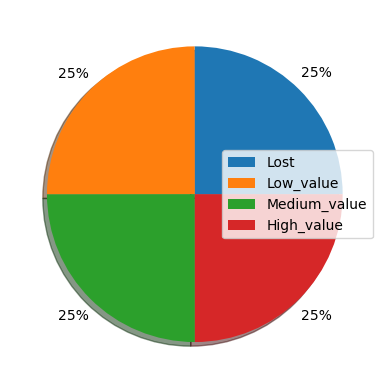

In [112]:
#The distribution of RFMI Groups
rfmi_pie=rfmi_segment_table["RFMI_Group"].value_counts()
plt.pie(rfmi_pie,autopct="%1.0f%%",labels=None,pctdistance=1.16,shadow=True)
plt.legend(rfmi_pie.index,loc="right")

In [114]:
#checking descriptive statistics
rfmi.describe()

,CustomerID,Recency,Frequency,Monetary,Interval
count,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000
mean,15291.899969,93.746671,55.648808,883.250561,1.676221
std,1705.308833,90.501376,48.277421,801.165865,1.979603
min,12349.000000,1.000000,1.000000,6.200000,0.000000
25%,13823.000000,23.000000,19.000000,301.030000,0.000000
50%,15286.000000,58.000000,40.000000,607.530000,1.048193
75%,16753.000000,149.000000,81.000000,1227.430000,2.674242
max,18287.000000,327.000000,223.000000,3692.280000,8.000000


**Visualization of Distribution of RFMI Values**

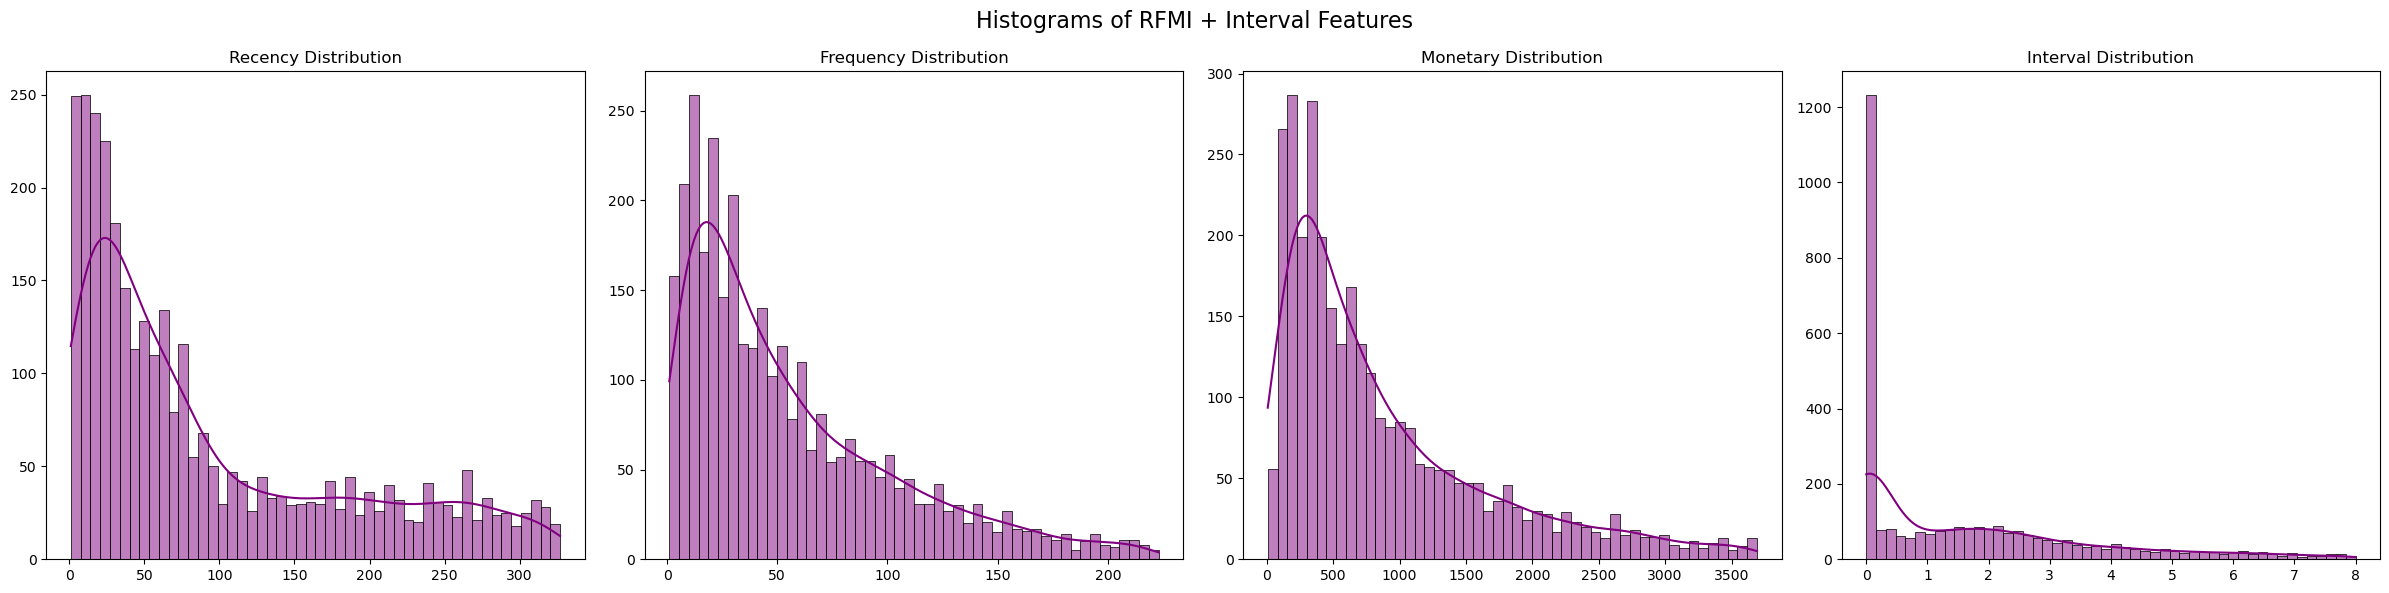

In [119]:
#creating histograms for each attribute
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
cols = ['Recency', 'Frequency', 'Monetary', 'Interval']

# Create subplots
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

# Plot each histogram
for i, col in enumerate(cols):
    sns.histplot(data=rfmi, x=col, color="purple", bins=50, kde=True, ax=ax[i])
    ax[i].set_title(f"{col} Distribution", fontsize=12)
    ax[i].set_xlabel("")  # Optional: remove x-labels
    ax[i].set_ylabel("")

# Set main title
fig.suptitle("Histograms of RFMI + Interval Features", fontsize=16)
plt.tight_layout()
plt.show()

As it can be clearly seen that RFMI attributes are highly skewed. The log transformation will be used to transform skewed data to approximately conform to normality.

In [122]:
print(rfmi.columns)


Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Interval'], dtype='object')


In [124]:
#unskew RFMi attributes with log transformations
rfmi_log = rfmi.apply(np.log, axis = 1).round(2)
rfmi_log.head(10)

,CustomerID,Recency,Frequency,Monetary,Interval
3,9.42,2.94,4.29,7.47,-inf
4,9.42,5.74,2.83,5.81,-inf
5,9.42,3.61,4.44,7.83,1.01
6,9.42,5.32,1.39,4.49,-inf
7,9.42,5.45,4.06,6.98,-inf
8,9.42,5.37,2.56,6.13,-inf
9,9.42,3.14,4.08,7.94,1.65
13,9.42,3.97,4.86,7.89,0.15
14,9.42,5.66,2.30,5.25,-inf
16,9.42,4.70,3.14,6.31,1.79


**RFMI Values Normalization**

In [137]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Apply log transformation
rfmi_log = np.log1p(rfmi[['Recency', 'Frequency', 'Monetary', 'Interval']])

# Step 2: Apply StandardScaler
scaler = StandardScaler()
rfmi_scaled_array = scaler.fit_transform(rfmi_log)

# Step 3: Convert scaled array to DataFrame
rfmi_scaled_df = pd.DataFrame(rfmi_scaled_array, index=rfmi_log.index, columns=rfmi_log.columns)

# Step 4: Reset index for both DataFrames to align rows
rfmi_segment_table.reset_index(drop=True, inplace=True)
rfmi_scaled_df.reset_index(drop=True, inplace=True)

# Step 5: Assign cluster group to scaled DataFrame
rfmi_scaled_df["RFMI_Group"] = rfmi_segment_table["RFMI_Group"]

# Step 6: View result
rfmi_scaled_df.head(10)


,Recency,Frequency,Monetary,Interval,RFMI_Group
0,-0.820791,0.688168,1.144316,-1.049213,High_value
1,1.472966,-0.755308,-0.568246,-1.049213,Low_value
2,-0.284893,0.841616,1.510837,0.839280,High_value
3,1.126367,-2.063228,-1.927936,-1.049213,Lost
4,1.232774,0.456868,0.640798,-1.049213,Medium_value
5,1.165944,-1.011917,-0.240837,-1.049213,Low_value
6,-0.668566,0.474029,1.629643,1.562051,High_value
7,0.008497,1.263508,1.573238,0.049797,High_value
8,1.409030,-1.258160,-1.150745,-1.049213,Low_value
9,0.610097,-0.461565,-0.051420,1.734045,Low_value


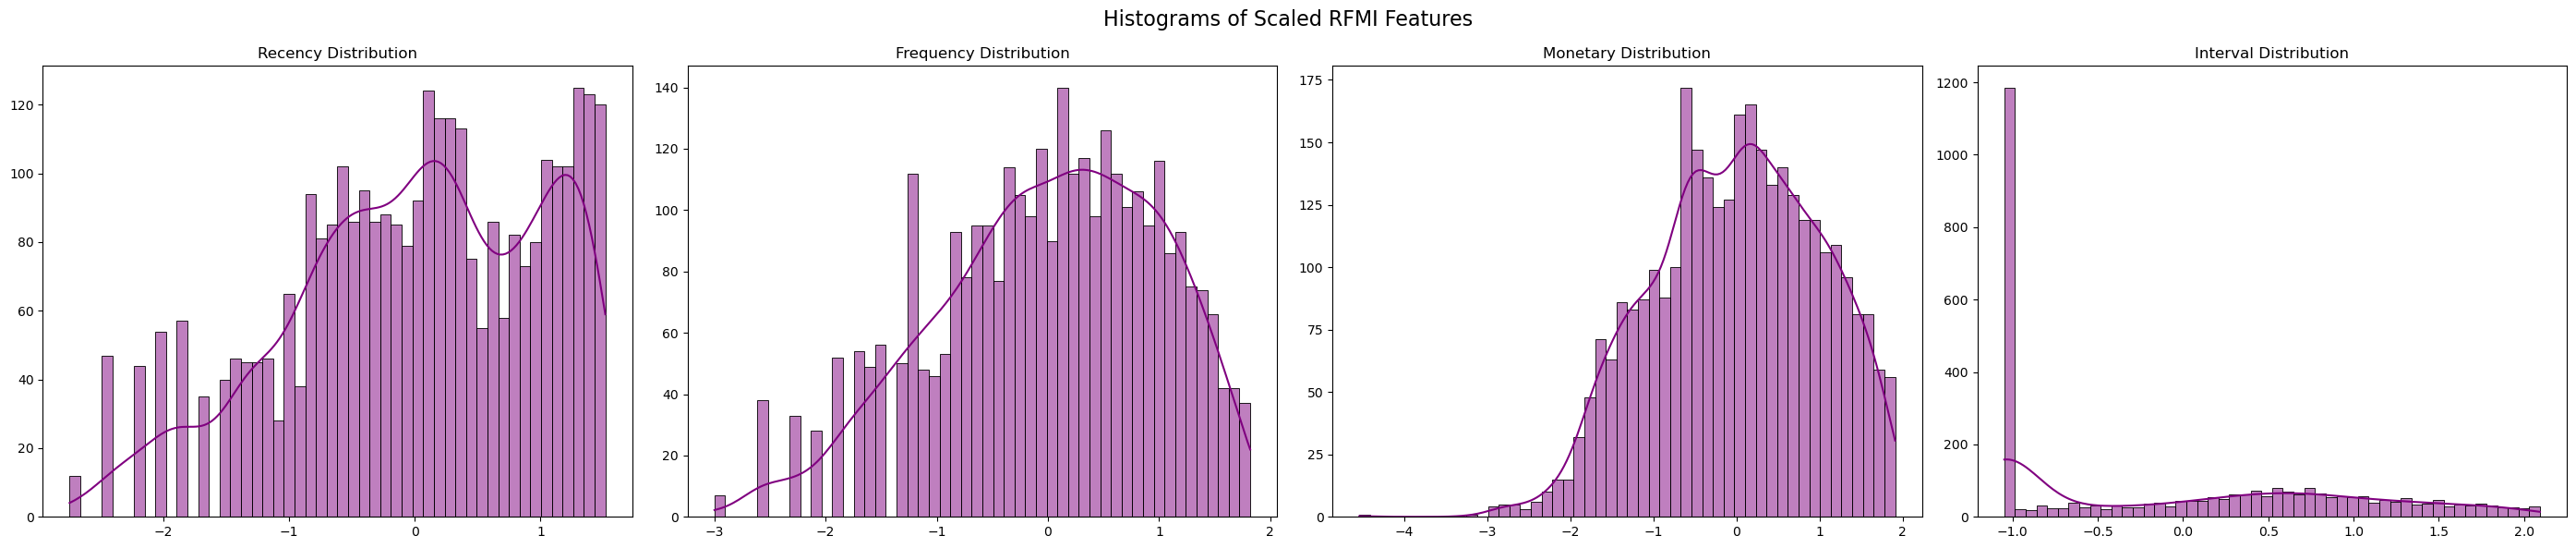

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to plot
cols = ['Recency', 'Frequency', 'Monetary', 'Interval']

# Create subplots
fig, ax = plt.subplots(1, 4, figsize=(28, 6))

# Plot histograms using the DataFrame
for i, col in enumerate(cols):
    sns.histplot(data=rfmi_scaled_df, x=col, color="purple", bins=50, kde=True, ax=ax[i])
    ax[i].set_title(f"{col} Distribution", fontsize=12)
    ax[i].set_xlabel("")  # Optional: clean x-axis
    ax[i].set_ylabel("")  # Optional: clean y-axis

# Main title
fig.suptitle("Histograms of Scaled RFMI Features", fontsize=16)
plt.tight_layout()
plt.show()


**Determining Optimum Number of Clusters**
We will analyze two methods to find the optimum number of clusters and compare the results.

**Elbow Method**

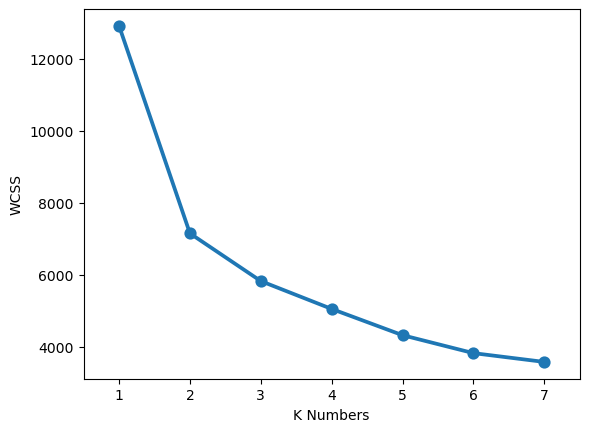

In [144]:
# find the optimum number of clusters (k) using the Elbow method
wcss = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(rfmi_scale)
    wcss[k] = kmeans.inertia_
    
# plot the WCSS values
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()

**Silhouette Method**

In [149]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Step 1: Apply PCA (optional, for visualization and noise reduction)
pca = PCA(n_components=2)
rfmi_pca = pca.fit_transform(rfmi_scaled_df[['Recency', 'Frequency', 'Monetary', 'Interval']])  # use scaled features

# Step 2: Find the best k using silhouette score
best_score = -1
best_k = 0

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=100, random_state=42)
    labels = kmeans.fit_predict(rfmi_pca)
    score = silhouette_score(rfmi_pca, labels)
    print(f"For n_clusters = {k}, silhouette score = {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_k = k

# Step 3: Final KMeans model using best_k
final_model = KMeans(n_clusters=best_k, init='k-means++', n_init=100, random_state=42)
cluster_labels = final_model.fit_predict(rfmi_pca)

# Step 4: Store results
rfmi_segment_table = pd.DataFrame(rfmi_pca, columns=["PCA1", "PCA2"])
rfmi_segment_table["K_Cluster"] = cluster_labels

# Step 5: Output
print(f"\n✅ Best number of clusters: {best_k}, with silhouette score: {best_score:.4f}")
rfmi_segment_table.head()


For n_clusters = 2, silhouette score = 0.4867
For n_clusters = 3, silhouette score = 0.4024
For n_clusters = 4, silhouette score = 0.3934
For n_clusters = 5, silhouette score = 0.3647
For n_clusters = 6, silhouette score = 0.3708
For n_clusters = 7, silhouette score = 0.3667

✅ Best number of clusters: 2, with silhouette score: 0.4867


,PCA1,PCA2,K_Cluster
0,-0.899550,0.912066,0
1,1.804934,-0.652045,1
2,-1.826476,-0.487252,0
3,3.175895,-0.010946,1
4,0.339380,-0.749192,1


In [151]:
print(rfmi_scaled.shape)


(3229, 4)


By considering both methods, k=2 is selected as an optimum cluster number for k-means clustering algorithm.

**Customer Segmentation based on K-Means Clusters**

Now we have to compare RFM Groups and K - Means clusters bu the Visualizations results

# Results

**Visualization of K-Means Clusters**

In [157]:
# Create DataFrame from scaled RFMI values
rfmi_scaled_df = pd.DataFrame(
    rfmi_scaled, 
    columns=['Recency', 'Frequency', 'Monetary', 'Interval']
)

# Optional: Reset index of rfmi if it was used for ID
rfmi.reset_index(drop=True, inplace=True)

# Add K-Means cluster labels (make sure lengths match)
rfmi_scaled_df['K_Cluster'] = final_model.labels_

# Add original RFMI group if available (and if length matches)
# Optional: Only do this if RFMI_Group is available and correctly aligned
if 'RFMI_Group' in rfmi.columns and len(rfmi) == len(rfmi_scaled_df):
    rfmi_scaled_df['RFMI_Group'] = rfmi['RFMI_Group'].values

# View the result
rfmi_scaled_df.head()



,Recency,Frequency,Monetary,Interval,K_Cluster
0,-0.820791,0.688168,1.144316,-1.049213,0
1,1.472966,-0.755308,-0.568246,-1.049213,1
2,-0.284893,0.841616,1.510837,0.839280,0
3,1.126367,-2.063228,-1.927936,-1.049213,1
4,1.232774,0.456868,0.640798,-1.049213,1


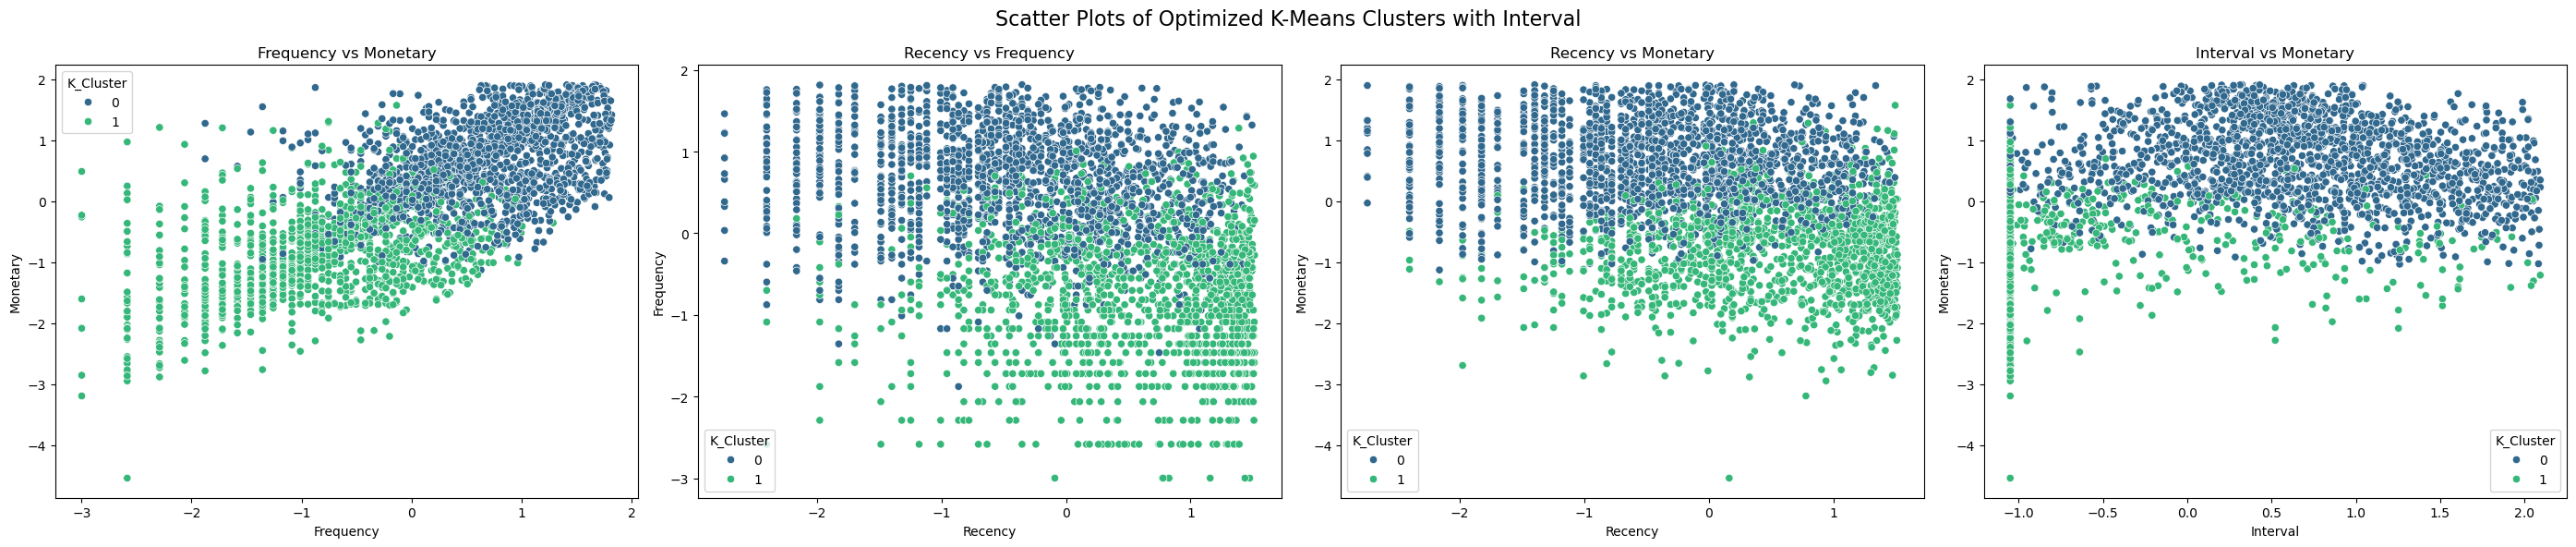

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create 4 subplots
fig, ax = plt.subplots(1, 4, figsize=(28, 6))

sns.scatterplot(
    data=rfmi_scaled_df,
    x="Frequency", y="Monetary", hue="K_Cluster", palette="viridis", ax=ax[0]
)
ax[0].set_title("Frequency vs Monetary")

sns.scatterplot(
    data=rfmi_scaled_df,
    x="Recency", y="Frequency", hue="K_Cluster", palette="viridis", ax=ax[1]
)
ax[1].set_title("Recency vs Frequency")

sns.scatterplot(
    data=rfmi_scaled_df,
    x="Recency", y="Monetary", hue="K_Cluster", palette="viridis", ax=ax[2]
)
ax[2].set_title("Recency vs Monetary")

sns.scatterplot(
    data=rfmi_scaled_df,
    x="Interval", y="Monetary", hue="K_Cluster", palette="viridis", ax=ax[3]
)
ax[3].set_title("Interval vs Monetary")

# Main title and layout
fig.suptitle("Scatter Plots of Optimized K-Means Clusters with Interval", fontsize=16)
plt.tight_layout()
plt.show()



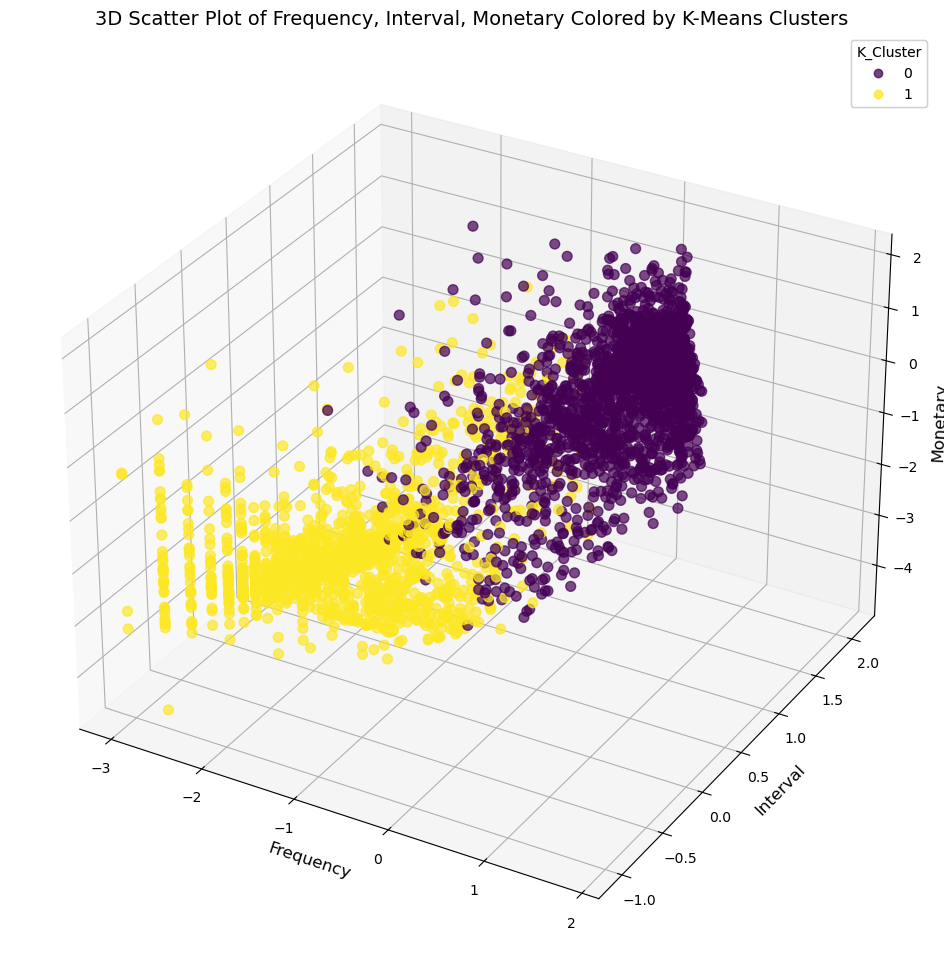

In [161]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 3D Scatter Plot of Frequency, Interval, Monetary with Cluster Coloring
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with Interval
scatter = ax.scatter(
    rfmi_scaled_df["Frequency"],
    rfmi_scaled_df["Interval"],
    rfmi_scaled_df["Monetary"],
    c=rfmi_scaled_df["K_Cluster"],
    cmap='viridis',
    s=50,
    alpha=0.7
)

# Axis labels and title
ax.set_xlabel("Frequency", fontsize=12)
ax.set_ylabel("Interval", fontsize=12)
ax.set_zlabel("Monetary", fontsize=12)
ax.set_title("3D Scatter Plot of Frequency, Interval, Monetary Colored by K-Means Clusters", fontsize=14)

# Color legend
legend1 = ax.legend(*scatter.legend_elements(), title="K_Cluster")
ax.add_artist(legend1)

plt.show()


Finally, we have two distinctive clusters!

# Conclusion
Based on the final clustering, we identified two distinctive customer groups:

- Cluster 1: Represents high-value customers — they buy frequently, spend more, and have purchased recently. This segment includes your most loyal and profitable buyers.

- Cluster 0: Represents low-value or lost customers — they buy infrequently, haven't purchased recently, and spend very little.

There is a strong positive correlation observed between monetary value, order frequency, and recency, supporting the reliability of these clusters.